# 数据预处理

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split







In [6]:
# 读取数据集
data = pd.read_csv('Loan_defaults_training.csv')
data

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,homeOwnership,annualIncome,...,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,isDefault
0,0,35000,5,19.52,917.97,E,E2,320,2,110000.0,...,7,0,0.0,24178,48.9,27,0,0,1,1
1,1,18000,5,18.49,461.90,D,D2,219843,0,46000.0,...,13,0,0.0,15096,38.9,18,1,0,1723,0
2,2,12000,5,16.99,298.17,D,D3,31698,0,74000.0,...,11,0,0.0,4606,51.8,27,0,0,0,0
3,3,11000,3,7.26,340.96,A,A4,46854,1,118000.0,...,9,0,0.0,9948,52.6,28,1,0,4,0
4,4,3000,3,12.99,101.07,C,C2,54,1,29000.0,...,12,0,0.0,2942,32.0,27,0,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,10000,3,17.09,356.98,D,D1,7484,1,24000.0,...,6,0,0.0,7858,81.0,15,1,0,0,0
99996,99996,11225,5,17.57,282.43,D,D4,72305,0,65000.0,...,13,0,0.0,13321,69.4,28,0,0,6,0
99997,99997,20000,3,11.99,664.20,B,B3,213814,1,63000.0,...,10,0,0.0,12171,55.8,28,0,0,0,0
99998,99998,10000,3,11.55,330.00,B,B3,219259,1,52000.0,...,7,0,0.0,3680,35.7,14,1,0,4,0


In [7]:
# 删除id列
data = data.drop(columns=['id'])

# 识别分类变量
categorical_cols = ['grade', 'subGrade', 'employmentTitle', 'purpose', 'postCode', 'regionCode',
                    'initialListStatus', 'applicationType', 'title']

# Label Encoding
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# 处理缺失值
imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data)


# Label Encoding
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# 目标变量
y = data['isDefault']

# 自变量
X = data.drop(columns=['isDefault'])

# 处理缺失值
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 主成分分析（PCA）

In [8]:
from sklearn.decomposition import PCA

# 主成分分析 (PCA)
pca = PCA(n_components=0.8)  # 保留80%的方差
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# 使用多种分类算法进行建模

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 定义分类算法
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# 训练和评估模型
results = {}
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_rep,
        'Confusion Matrix': confusion_mat
    }

# 输出结果
for name, result in results.items():
    print(f'---{name}---')
    print('Accuracy:', result['Accuracy'])
    print('Classification Report:\n', result['Classification Report'])
    print('Confusion Matrix:\n', result['Confusion Matrix'])
    print('\n')


/Users/L.J.Wang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


---Logistic Regression---
Accuracy: 0.7983333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89     23951
           1       0.50      0.07      0.12      6049

    accuracy                           0.80     30000
   macro avg       0.65      0.53      0.51     30000
weighted avg       0.75      0.80      0.73     30000

Confusion Matrix:
 [[23520   431]
 [ 5619   430]]


---Random Forest---
Accuracy: 0.7985333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89     23951
           1       0.50      0.07      0.12      6049

    accuracy                           0.80     30000
   macro avg       0.65      0.52      0.50     30000
weighted avg       0.75      0.80      0.73     30000

Confusion Matrix:
 [[23558   393]
 [ 5651   398]]


---Support Vector Machine---
Accuracy: 0.7991666666666667
Classification Report:
         

# 比较模型效果

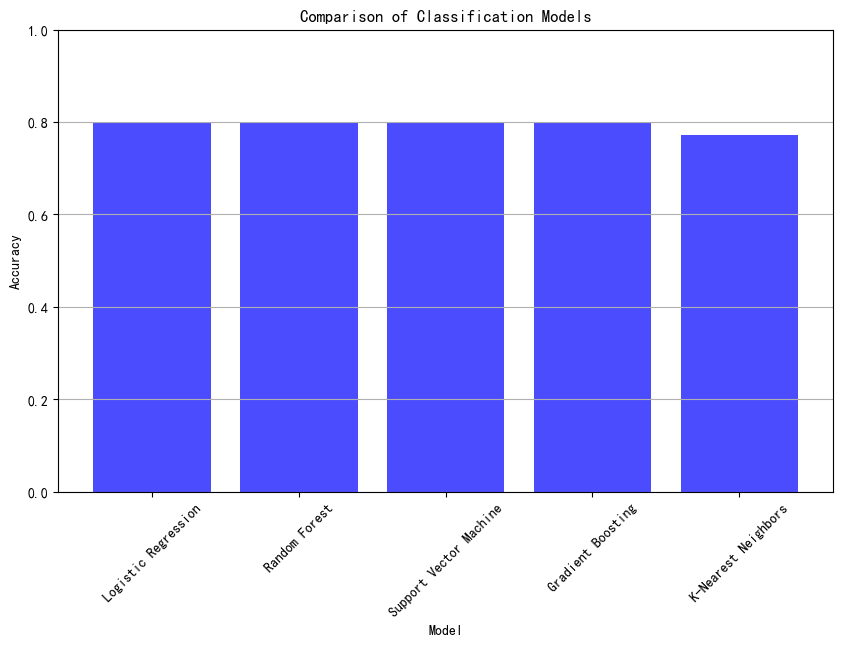

In [10]:
import matplotlib.pyplot as plt

# 提取准确率
accuracies = {name: result['Accuracy'] for name, result in results.items()}

# 可视化比较
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='b', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


In [18]:
 #保存标准化模型和PCA模型
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [15]:

# 训练模型并保存
for model_name, model in models.items():
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}.pkl')

In [22]:
# 读取新数据集
new_data = pd.read_csv('Loan_defaults_scoring.csv')

# 删除id列（如果存在）
if 'id' in new_data.columns:
    new_data = new_data.drop(columns=['id'])
# 识别分类变量
categorical_cols = ['grade', 'subGrade', 'employmentTitle', 'purpose', 'postCode', 'regionCode',
                    'initialListStatus', 'applicationType', 'title']

# Label Encoding
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    new_data[col] = label_encoders[col].fit_transform(new_data[col])


# 处理缺失值
X_new_imputed = imputer.transform(new_data)

# 标准化新数据
X_new_scaled = scaler.transform(X_new_imputed)

# 对新数据进行PCA降维
# 主成分分析 (PCA)
pca = PCA(n_components=0.8)  # 保留80%的方差
X_train_pca = pca.fit_transform(X_train)
X_new_pca = pca.transform(X_new_scaled)






# 对每个模型进行预测，并将预测结果添加到新数据集中
for model_name, model in models.items():
    model = joblib.load(f'{model_name.lower().replace(" ", "_")}.pkl')
    new_data[model_name + '_Prediction'] = model.predict(X_new_pca)

# 保存包含预测结果的新数据集到新的CSV文件
new_data.to_csv('Loan_defaults_scoring_with_predictions.csv', index=False)

/Users/L.J.Wang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
# 读取数据集
data = pd.read_csv('Loan_defaults_scoring_with_predictions.csv')


,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,homeOwnership,annualIncome,purpose,...,revolUtil,totalAcc,initialListStatus,applicationType,title,Logistic Regression_Prediction,Random Forest_Prediction,Support Vector Machine_Prediction,Gradient Boosting_Prediction,K-Nearest Neighbors_Prediction
11471,3000,3,7.89,93.86,0,4,4409,0,42000.0,2,...,0.0,17,0,0,5,0,0,0,0,0
26128,15600,5,15.61,376.14,3,15,8244,0,70000.0,4,...,63.1,32,0,0,4,0,0,0,0,0
4228,8000,3,11.99,265.68,1,7,73,0,76000.0,5,...,25.9,30,1,0,2234,0,0,0,0,0
31476,9650,3,16.99,344.01,3,17,214,1,44000.0,0,...,77.2,11,0,0,0,0,0,0,0,0
43649,35000,3,15.99,1230.33,2,14,446,1,93000.0,0,...,26.6,27,1,0,0,0,0,0,0,0
39644,15000,3,14.46,516.03,2,13,239,0,43000.0,4,...,76.3,11,0,0,4,0,0,0,0,0
38682,9000,3,14.48,309.71,2,14,2132,0,65000.0,4,...,36.9,8,0,0,4,0,0,0,0,0
26208,10175,3,6.62,312.41,0,1,22143,0,100000.0,4,...,50.1,17,1,0,55,0,0,0,0,0
15016,20000,3,7.69,623.88,0,3,9196,1,90000.0,0,...,29.1,16,0,0,0,0,0,0,0,0
34025,6000,3,8.59,189.66,0,4,23529,2,20800.0,0,...,17.1,20,0,0,0,0,0,0,0,0


In [25]:
data.sample(20)

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,homeOwnership,annualIncome,purpose,...,revolUtil,totalAcc,initialListStatus,applicationType,title,Logistic Regression_Prediction,Random Forest_Prediction,Support Vector Machine_Prediction,Gradient Boosting_Prediction,K-Nearest Neighbors_Prediction
38188,2800,3,11.99,92.99,2,10,3613,1,30000.0,0,...,29.5,40,0,0,0,0,0,0,0,0
40047,35000,3,11.99,1162.34,2,10,694,0,150000.0,4,...,83.9,24,0,0,4,0,0,0,0,0
47755,9900,3,10.49,321.73,1,6,19276,1,56600.0,4,...,69.1,3,0,0,4,0,0,0,0,0
3216,40000,3,5.32,1204.60,0,0,117,1,188000.0,5,...,10.4,27,1,0,6,0,0,0,0,0
10526,10000,3,15.61,349.65,2,12,160,1,36000.0,0,...,51.0,15,1,0,0,0,0,0,0,1
34493,19200,3,5.32,578.21,0,0,1115,0,90000.0,0,...,46.1,22,0,0,0,0,0,0,0,0
21220,4000,3,19.24,147.11,4,21,35,1,17800.0,5,...,47.6,26,1,0,6,0,0,0,0,0
16012,11200,3,19.99,416.18,4,23,5619,1,35000.0,2,...,3.3,11,0,0,5,0,0,0,0,1
34961,8000,3,7.96,250.55,0,4,16864,1,81000.0,4,...,46.3,32,0,0,4,0,0,0,0,0
9617,36000,5,12.13,803.17,1,9,8480,0,52000.0,0,...,0.0,6,0,1,0,0,0,0,0,0
